# CS584 Machine Learning Fall 2022

Illinois Institute of Technology <br>
Prof. Yan Yan (yyan34@iit.edu) <br>
TA. Izzet Yildirim (iyildirim@hawk.iit.edu)

In [1]:
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore")

## Real-world ML

* "Real-world" in the scope of our class
* Thanks to students who shared feedback on today's subject
* Mixing your feedback with my original plan;
 * We will discuss data cleaning and preparation techniques (Pandas, NumPy, Scikit-learn)
 * How to visualize and understand the data (Matplotlib, Pandas, Seaborn)
 * How to compare models and find the most suitable one (Scikit-learn, Optuna)

In [ ]:
# Install packages
! pip install matplotlib numpy pandas optuna scikit-learn seaborn --disable-pip-version-check

## California House Price Prediction [[Source](https://www.kaggle.com/code/heyrobin/house-price-prediction-beginner-s-notebook/notebook)]

In this dataset we have to predict the final prices of the houses from features given. The dataset cointains 79 explanatory variables. 

### Load & Visualize Data

In [ ]:
# Import Pandas package
import pandas as pd

# Read CSV files using Pandas
house_train_data = pd.read_csv('house-prices/train.csv')
house_test_data = pd.read_csv('house-prices/test.csv')

# Get top 10 rows from training data
house_train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
# Describe data using Pandas
# 'T' for transpose
house_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


* We have seen the initial stats of the data 
* Let's explore it further

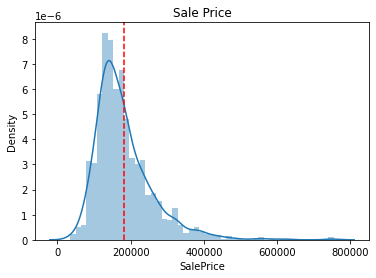

In [ ]:
# Import Matplotlib and Seaborn package
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sale_price(df):
  # Visualize target variable distribution
  sns.distplot(df['SalePrice'])

  # Add mean line to the plot
  plt.axvline(x=df['SalePrice'].mean(), color='red', linestyle='--')
  plt.title("Sale Price")

# Plot sale price
plot_sale_price(house_train_data)

**Relationships**

* Let's start with the living area and the sale price
* We expect to see a linear relationship

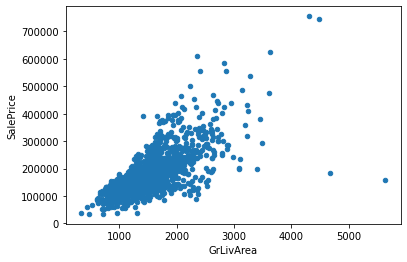

In [ ]:
liv_area_sale_price_df = pd.concat([house_train_data['SalePrice'], house_train_data['GrLivArea']], axis=1)
liv_area_sale_price_df.plot.scatter(x='GrLivArea', y='SalePrice')

* Let's see the relationship between **the overall quality and the sale price**
* Again, we expect a similar relationship

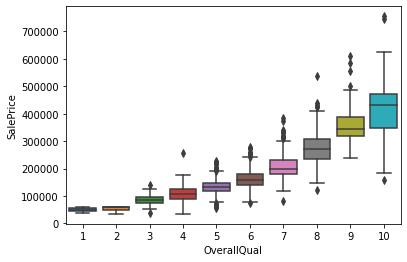

In [ ]:
qual_sale_price_df = pd.concat([house_train_data['SalePrice'], house_train_data['OverallQual']], axis=1)
sns.boxplot(x='OverallQual', y='SalePrice', data=qual_sale_price_df)

* Let's see the relationship between **the age of the building and the sale price**
* Again, we expect a positive correlation

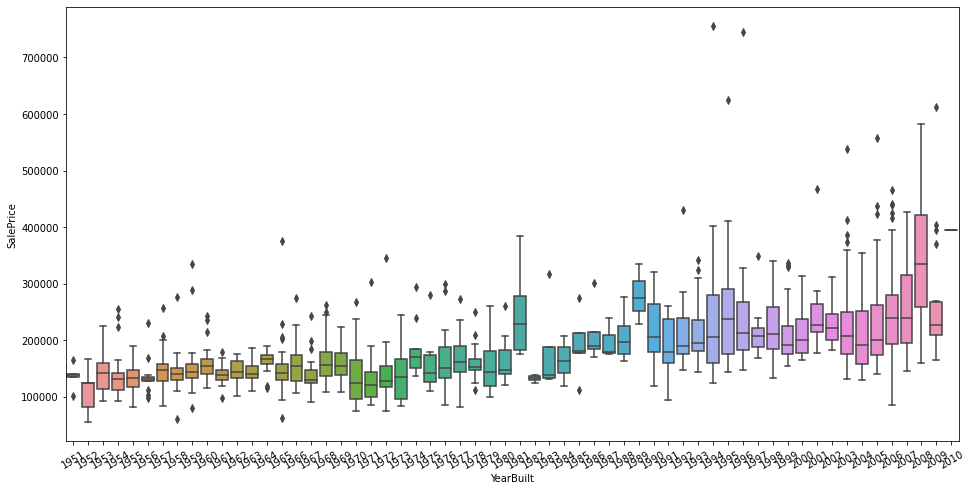

In [ ]:
year_built_sale_price_df = pd.concat([house_train_data['SalePrice'], house_train_data['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
sns.boxplot(x='YearBuilt', y='SalePrice', data=year_built_sale_price_df[year_built_sale_price_df['YearBuilt'] > 1950])

* So, are we supposed to find all the correlations ourselves? Manually?
* Let's play smarter and plot the correlation matrix!

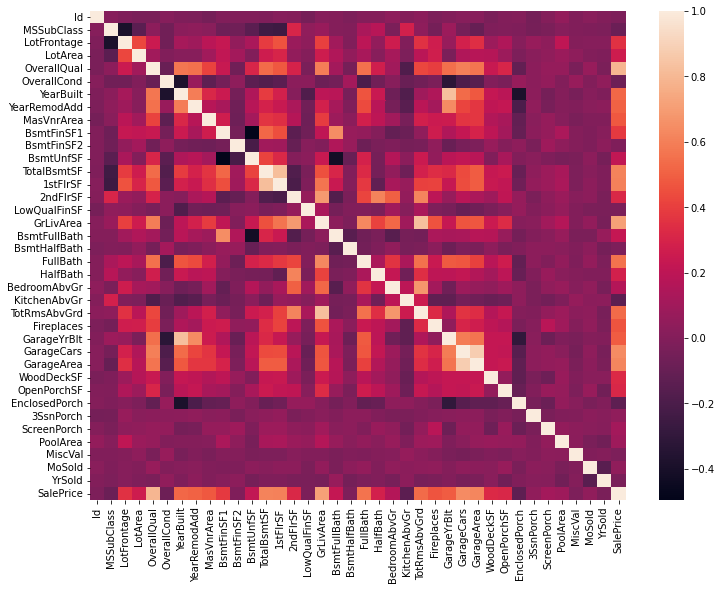

In [ ]:
# Get correlations from our dataframe
house_corr_mat = house_train_data.corr()

# Plot it heatmap style
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(house_corr_mat)

### Pre-Processing

Checking missing values is very important to understand the health of our data:

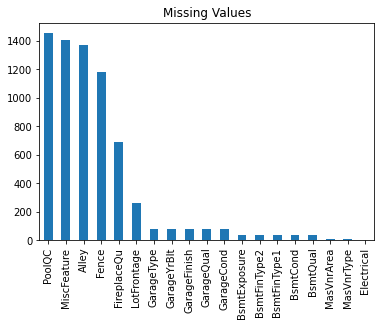

In [ ]:
def plot_missing_values(df):
  # Sum all missing values
  missing_df = df.isnull().sum()

  # Eliminate non-missing values
  missing_df = missing_df[missing_df > 0]

  # Sort missing values
  missing_df = missing_df.sort_values(ascending=False)

  # Plot missing values
  missing_df.plot.bar()
  plt.title("Missing Values")

plot_missing_values(house_train_data)

* It is incredibly difficult (sometimes impossible) to fix missing values when they consist of more than 50% of all data
* In this case, values like PoolQC, MiscFeature, Alley etc. exceed that threshold
* So, we will drop them all and try to fix the remaning missing values

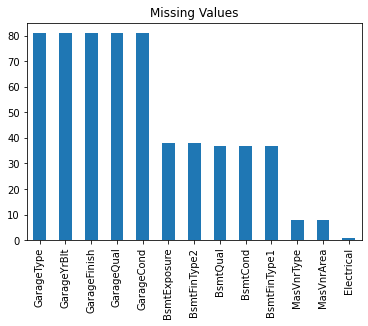

In [ ]:
# First let's save our target values to variable
house_train_y = house_train_data['SalePrice']

# Then drop missing values along with the target value since we saved it 
house_train_data = house_train_data.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'SalePrice'], axis=1)
house_test_data = house_test_data.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)

# Plot missing values again
plot_missing_values(house_train_data)

Let's look at the top 10 rows again:

In [ ]:
house_train_data.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,30,0,320,0,0,700,10,2009,WD,Normal
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,57,0,0,0,0,0,8,2007,WD,Normal
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,204,228,0,0,0,350,11,2009,WD,Normal
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0,205,0,0,0,0,4,2008,WD,Abnorml
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,4,0,0,0,0,0,1,2008,WD,Normal


Let's look at it closely, especially to still missing ones:

In [ ]:
house_train_data[house_train_data['BsmtQual'].isna()][['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'BsmtQual']].head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,BsmtQual
17,90,RL,10791,Pave,Reg,Lvl,NaN
39,90,RL,6040,Pave,Reg,Lvl,NaN
90,20,RL,7200,Pave,Reg,Lvl,NaN
102,90,RL,7018,Pave,Reg,Bnk,NaN
156,20,RL,7200,Pave,Reg,Lvl,NaN


Instead of dropping those (since there only a few of them), we can fill them with the same value -- in this case, with `none`:

In [ ]:
# First define such columns
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                'GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType',
                'Electrical','MSZoning','Utilities','Functional','Exterior2nd',
                'KitchenQual','Exterior1st','SaleType']

# Then fill them with 'none' using fillna function
house_train_data[columns_None] = house_train_data[columns_None].fillna('none')
house_test_data[columns_None] = house_test_data[columns_None].fillna('none')

# And visualize the data again
house_train_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


* Another problem with the data is that there are arbitrary numbers in columns like `LotArea`, `OpenPorchSF`
* We do not like such arbitrary numbers as do not contribute equally to the model fitting function and might end up creating a bias
* We need to normalize such numbers so they would be transformed into the range `[0,1]`
* This is called **normalization/standardization** 

In [ ]:
# First, import SimpleImputer and MinMaxScaler from Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

* `SimpleImputer` completes missing values with a simple strategy (default strategy is `mean`)
* `MinMaxScaler` transforms values into `[0,1]` range 
* Let's find all `int` and `float` columns and transform them



In [ ]:
house_train_data.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 73, dtype: object

In [ ]:
# Find `num_cols` and `cat_cols` -- We will transform `num_cols` first
house_train_num_cols = [col for col in house_train_data.columns if house_train_data[col].dtype in ['float64','int64']]
house_train_cat_cols = [col for col in house_train_data.columns if house_train_data[col].dtype not in ['float64','int64']]

# Let's look at numeric columns before transformation
house_train_data[house_train_num_cols].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,12,2008


In [ ]:
# First complete missing values
house_train_data[house_train_num_cols] = SimpleImputer().fit_transform(house_train_data[house_train_num_cols])
house_test_data[house_train_num_cols] = SimpleImputer().fit_transform(house_test_data[house_train_num_cols])

# Then transform them using MinMaxScaler
house_train_data[house_train_num_cols] = MinMaxScaler().fit_transform(house_train_data[house_train_num_cols])
house_test_data[house_train_num_cols] = MinMaxScaler().fit_transform(house_test_data[house_train_num_cols])

# Let's look at them again
house_train_data[house_train_num_cols].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


Let's fix the categorical data now

In [ ]:
# Visualize categorical data 
house_train_data[house_train_cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


* Text-based categorical data don't play well with ML models, so we need to encode it
* Fortunately, Scikit-learn provides [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [ ]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
house_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(house_train_data[house_train_cat_cols])

# Show new encoded column names
house_encoder.get_feature_names(house_train_cat_cols)[:100]

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWIS

In [ ]:
# Get encoded columns
house_train_encoded_cols = list(house_encoder.get_feature_names(house_train_cat_cols))

# Set encoded columns
house_train_data[house_train_encoded_cols] = house_encoder.transform(house_train_data[house_train_cat_cols])
house_test_data[house_train_encoded_cols] = house_encoder.transform(house_test_data[house_train_cat_cols])

In [ ]:
# Visualize encoded data 
house_train_data[house_train_encoded_cols].head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Visualize all data
house_train_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,RL,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,RL,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,RL,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,RL,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,RL,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


We're ready to train our model!

### Model Selection & Prediction

* This is a classic regression problem 
* However, instead of picking the `LinearRegression` model right away, we will use a smarter method:
* We will;
 * Train all available Scikit-learn regression models
 * Check their errors
 * Pick the one with the least error

In [ ]:
# Import all linear models from Scikit-learn
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a dictionary of models
house_models = {
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression()
}

house_models

{'Ridge': Ridge(),
 'ElasticNet': ElasticNet(),
 'SGDRegressor': SGDRegressor(),
 'BayesianRidge': BayesianRidge(),
 'LinearRegression': LinearRegression()}

Before going further, let's split our training data into training & validation datasets:

In [ ]:
# Import train_test_split method
from sklearn.model_selection import train_test_split

# Split data
house_X_train, house_X_val, house_y_train, house_y_val = train_test_split(house_train_data[house_train_num_cols + house_train_encoded_cols], 
                                                                          house_train_y,
                                                                          test_size=0.25)

print("Length of train data:", len(house_X_train))
print("Length of validation data:", len(house_X_val))

Length of train data: 1095
Length of validation data: 365


Let's train all the models:

In [ ]:
# Import NumPy
import numpy as np

# Import mean_squared_error from Scikit-learn
from sklearn.metrics import mean_squared_error

# Keep results
house_model_names = []
house_model_results = []

# Train models
for name, model in house_models.items():
  trained_model = model.fit(house_X_train, house_y_train)
  house_y_pred = trained_model.predict(house_X_val)
  score = np.sqrt(mean_squared_error(house_y_val, house_y_pred))
  house_model_names.append(name)
  house_model_results.append(score)

# Create a DataFrame from results
house_results_df = pd.DataFrame([house_model_names, house_model_results])
house_results_df = house_results_df.transpose()
house_results_df = house_results_df.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE', ascending=False)

# Output results
house_results_df

,Model,RMSE
4,LinearRegression,540588250404939.1875
1,ElasticNet,49637.5675
2,SGDRegressor,29831.099823
3,BayesianRidge,28623.10551
0,Ridge,28136.233575


* It seems the best model with the lowest `RMSE` is `SGDRegressor`
* So, the question is, can we further reduce the error?
* We could try to tune `SGDRegressor`s parameters, but how to guess the best parameters?

### Parameter Tuning

* There are libraries that help us tune model parameters 
* They go through every possible combination of parameters and find the best ones
* We will use [`Optuna`](https://optuna.org/) today 

In [ ]:
# Import Optuna 
import optuna

# Define our objective
def house_objective(trial):
  # Split data
  house_X_train, house_X_val, house_y_train, house_y_val = train_test_split(
    house_train_data[house_train_num_cols + house_train_encoded_cols], 
    house_train_y,
    test_size=0.25
  )
  # Model params
  params = {
      'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
      'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
      'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive']),
      'max_iter': trial.suggest_int('max_iter', 100, 10_000, 100),
      'penalty': trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet']),
      'random_state': trial.suggest_int('random_state', 0, 100, 5),
      'shuffle': trial.suggest_categorical('shuffle', [True, False]),
  }
  # Create model
  model = SGDRegressor(**params)
  trained_model = model.fit(house_X_train, house_y_train)
  house_y_pred = trained_model.predict(house_X_val)
  score = np.sqrt(mean_squared_error(house_y_val, house_y_pred))
  # Return trial score
  return score

house_study = optuna.create_study(direction='minimize')
house_study.optimize(house_objective, n_trials=50)

[I 2022-10-14 19:38:52,554] A new study created in memory with name: no-name-93740e18-5cf3-47bd-bbf4-72067e0ed680
[I 2022-10-14 19:38:52,592] Trial 0 finished with value: 61880.454239668725 and parameters: {'alpha': 9.860203548100458, 'fit_intercept': True, 'learning_rate': 'invscaling', 'max_iter': 6500, 'penalty': 'l2', 'random_state': 35, 'shuffle': True}. Best is trial 0 with value: 61880.454239668725.
[I 2022-10-14 19:38:52,622] Trial 1 finished with value: 79448.22319590897 and parameters: {'alpha': 6.842662352922923, 'fit_intercept': True, 'learning_rate': 'constant', 'max_iter': 9200, 'penalty': 'l2', 'random_state': 50, 'shuffle': True}. Best is trial 0 with value: 61880.454239668725.
[I 2022-10-14 19:39:03,754] Trial 2 finished with value: 47696.120548346196 and parameters: {'alpha': 1.514568987454789, 'fit_intercept': False, 'learning_rate': 'optimal', 'max_iter': 6400, 'penalty': 'elasticnet', 'random_state': 0, 'shuffle': True}. Best is trial 2 with value: 47696.1205483461

In [ ]:
# Store best parameters
house_best_params = house_study.best_params

# house_best_params = {'alpha': 0.0036717107995702758,
#  'fit_intercept': True,
#  'learning_rate': 'adaptive',
#  'max_iter': 3400,
#  'penalty': 'elasticnet',
#  'random_state': 55,
#  'shuffle': True}

# Print best parameters
house_best_params

{'alpha': 0.019135792523200575,
 'fit_intercept': False,
 'learning_rate': 'adaptive',
 'max_iter': 2100,
 'penalty': 'l2',
 'random_state': 30,
 'shuffle': True}

We've detected best parameters, let's train `SGDRegressor` once again:

In [ ]:
# Train the specific model with best parameters
house_model = SGDRegressor(**house_best_params)
house_trained_model = house_model.fit(house_X_train, house_y_train)

# Run on validation data again
house_y_pred = house_trained_model.predict(house_X_val)

Show expected and predicted house prices through the validation data:

In [ ]:
# Create prediction table
house_pred_df = pd.DataFrame({'Expected House Prices': house_y_val, 'Predicted House Prices': house_y_pred})

# Calculate difference
house_pred_df['Difference'] = house_pred_df['Expected House Prices'] - house_pred_df['Predicted House Prices']
house_pred_df['%'] = 100 * (house_pred_df['Expected House Prices'] - house_pred_df['Predicted House Prices']) / house_pred_df['Expected House Prices']

# Show prediction table
house_pred_df

,Expected House Prices,Predicted House Prices,Difference,%
553,108000,113785.095760,-5785.095760,-5.356570
843,141000,127369.995492,13630.004508,9.666670
709,109900,101503.203428,8396.796572,7.640397
138,230000,257684.647719,-27684.647719,-12.036803
1020,176000,162222.179899,13777.820101,7.828307
...,...,...,...,...
239,113000,124861.426215,-11861.426215,-10.496837
1247,169900,155379.288736,14520.711264,8.546622
1290,180500,167992.934816,12507.065184,6.929122
1415,175900,193800.751999,-17900.751999,-10.176664


In [ ]:
print("Mean deviation %:", abs(house_pred_df['%'].mean()))

Mean deviation %: 2.4975606426403933


So, the deviation seems to be negligible, let's predict house prices for the test data:

In [ ]:
house_test_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,RH,0.184147,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,RL,0.232124,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,RL,0.224197,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,RL,0.154326,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.588235,RL,0.064121,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Make predictions for the test data
house_y_pred_test = house_trained_model.predict(house_test_data[house_train_num_cols + house_train_encoded_cols])

# Add predictions into the test data
house_test_data['SalePrice'] = house_y_pred_test

# Ta da!
house_test_data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.000000,RH,0.184147,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,98882.451221
1,0.000000,RL,0.232124,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,146965.730222
2,0.235294,RL,0.224197,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,171867.779430
3,0.235294,RL,0.154326,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,184924.165661
4,0.588235,RL,0.064121,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,173841.199563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,RM,0.008453,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,73068.519129
1455,0.823529,RM,0.007691,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,77132.665296
1456,0.000000,RL,0.336115,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,144999.886735
1457,0.382353,RL,0.162724,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,115039.744463


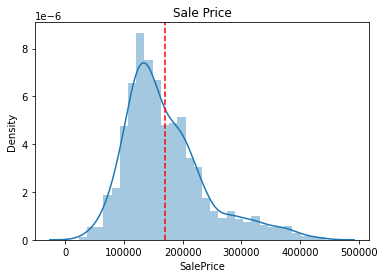

In [ ]:
# Plot sale prices
plot_sale_price(house_test_data)